### **Abstract**

In this notebook, we aim to generate a word cloud from the top search results of a Google query to provide a visual summary of the most frequently discussed topics related to the search. By extracting text content from the top-ranked URLs, we preprocess the data to clean it and remove irrelevant stop words. Additionally, we enhance the representation by incorporating bigrams and trigrams, which capture commonly occurring multi-word phrases. The text data is then analyzed for word frequency, and a word cloud is generated using Python libraries such as BeautifulSoup, NLTK, and WordCloud. This project demonstrates an automated method for summarizing web search results, making it easier to identify key themes and concepts without manually reading each web page.

In [3]:
!pip install beautifulsoup4 wordcloud googlesearch-python matplotlib nltk

In [25]:
# Reference:
# https://www.rappler.com/philippines/elections/senatorial-candidates-pulse-asia-survey-january-2025/

# List of names with party affiliations
data = [
    "TULFO, ERWIN (LAKAS)", "GO, BONG GO (PDPLBN)", "SOTTO, TITO (NPC)",
    "TULFO, BEN BITAG (IND)", "CAYETANO, PIA (NP)", "BONG REVILLA, RAMON, JR. (LAKAS)",
    "MARCOS, IMEE R. (NP)", "LACSON, PING (IND)", "REVILLAME, WILLIE WIL (IND)",
    "DELA ROSA, BATO (PDPLBN)", "BINAY, ABBY (NPC)", "PACQUIAO, MANNY PACMAN (PFP)",
    "VILLAR, CAMILLE (NP)", "LAPID, LITO (NPC)"
]

# Clean and organize data
names = [entry.split(' (')[0] for entry in data]  # Remove party affiliations
parties = [entry.split(' (')[1][:-1] for entry in data]  # Extract party affiliations
names

['TULFO, ERWIN',
 'GO, BONG GO',
 'SOTTO, TITO',
 'TULFO, BEN BITAG',
 'CAYETANO, PIA',
 'BONG REVILLA, RAMON, JR.',
 'MARCOS, IMEE R.',
 'LACSON, PING',
 'REVILLAME, WILLIE WIL',
 'DELA ROSA, BATO',
 'BINAY, ABBY',
 'PACQUIAO, MANNY PACMAN',
 'VILLAR, CAMILLE',
 'LAPID, LITO']

In [26]:
import urllib.request as url
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from googlesearch import search
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk

# Download NLTK data (for the first run)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# Define search query and parameters

def get_tokens(query, num_results=10):
  # Fetch top search result URLs
  urls = list(search(query=query, tld='com', lang='en', num=num_results, start=0, stop=num_results, pause=2.0))

  # Extract and clean text content from each URL
  text_data = ""
  for link in urls:
      try:
          response = url.urlopen(link)
          html_content = response.read()
          soup = BeautifulSoup(html_content, "lxml")
          text_data += soup.get_text(separator=" ")
      except Exception as e:
          print(f"Error fetching {link}: {e}")

  # Clean the text by removing non-alphabetic characters
  text_data = re.sub(r'[^a-zA-Z\s]', '', text_data).lower()

  # Tokenize text
  tokens = word_tokenize(text_data)

  # Remove stop words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  # Generate bigrams and trigrams
  bigrams = [' '.join(gram) for gram in ngrams(tokens, 2)]
  trigrams = [' '.join(gram) for gram in ngrams(tokens, 3)]

  return tokens, bigrams, trigrams

In [32]:
def display_word_cloud(tokens):

  # Count frequencies of words, bigrams, and trigrams
  word_freq = Counter(tokens)

  # Generate the word cloud with high resolution
  wordcloud = WordCloud(
      width=2000,
      height=1000,
      max_font_size=300,
      max_words=100,
      background_color="white"
  ).generate_from_frequencies(word_freq)

  # Display the word cloud with high resolution
  plt.figure(figsize=(15, 10), dpi=200)  # Increase figsize and dpi for higher resolution
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


Error fetching https://www.congress.gov.ph/house-members/view/?member=K140&name=Tulfo%2C+Erwin+T.: HTTP Error 403: Forbidden
Error fetching https://www.instagram.com/erwintulforeal/: HTTP Error 429: Too Many Requests
Name:  TULFO, ERWIN


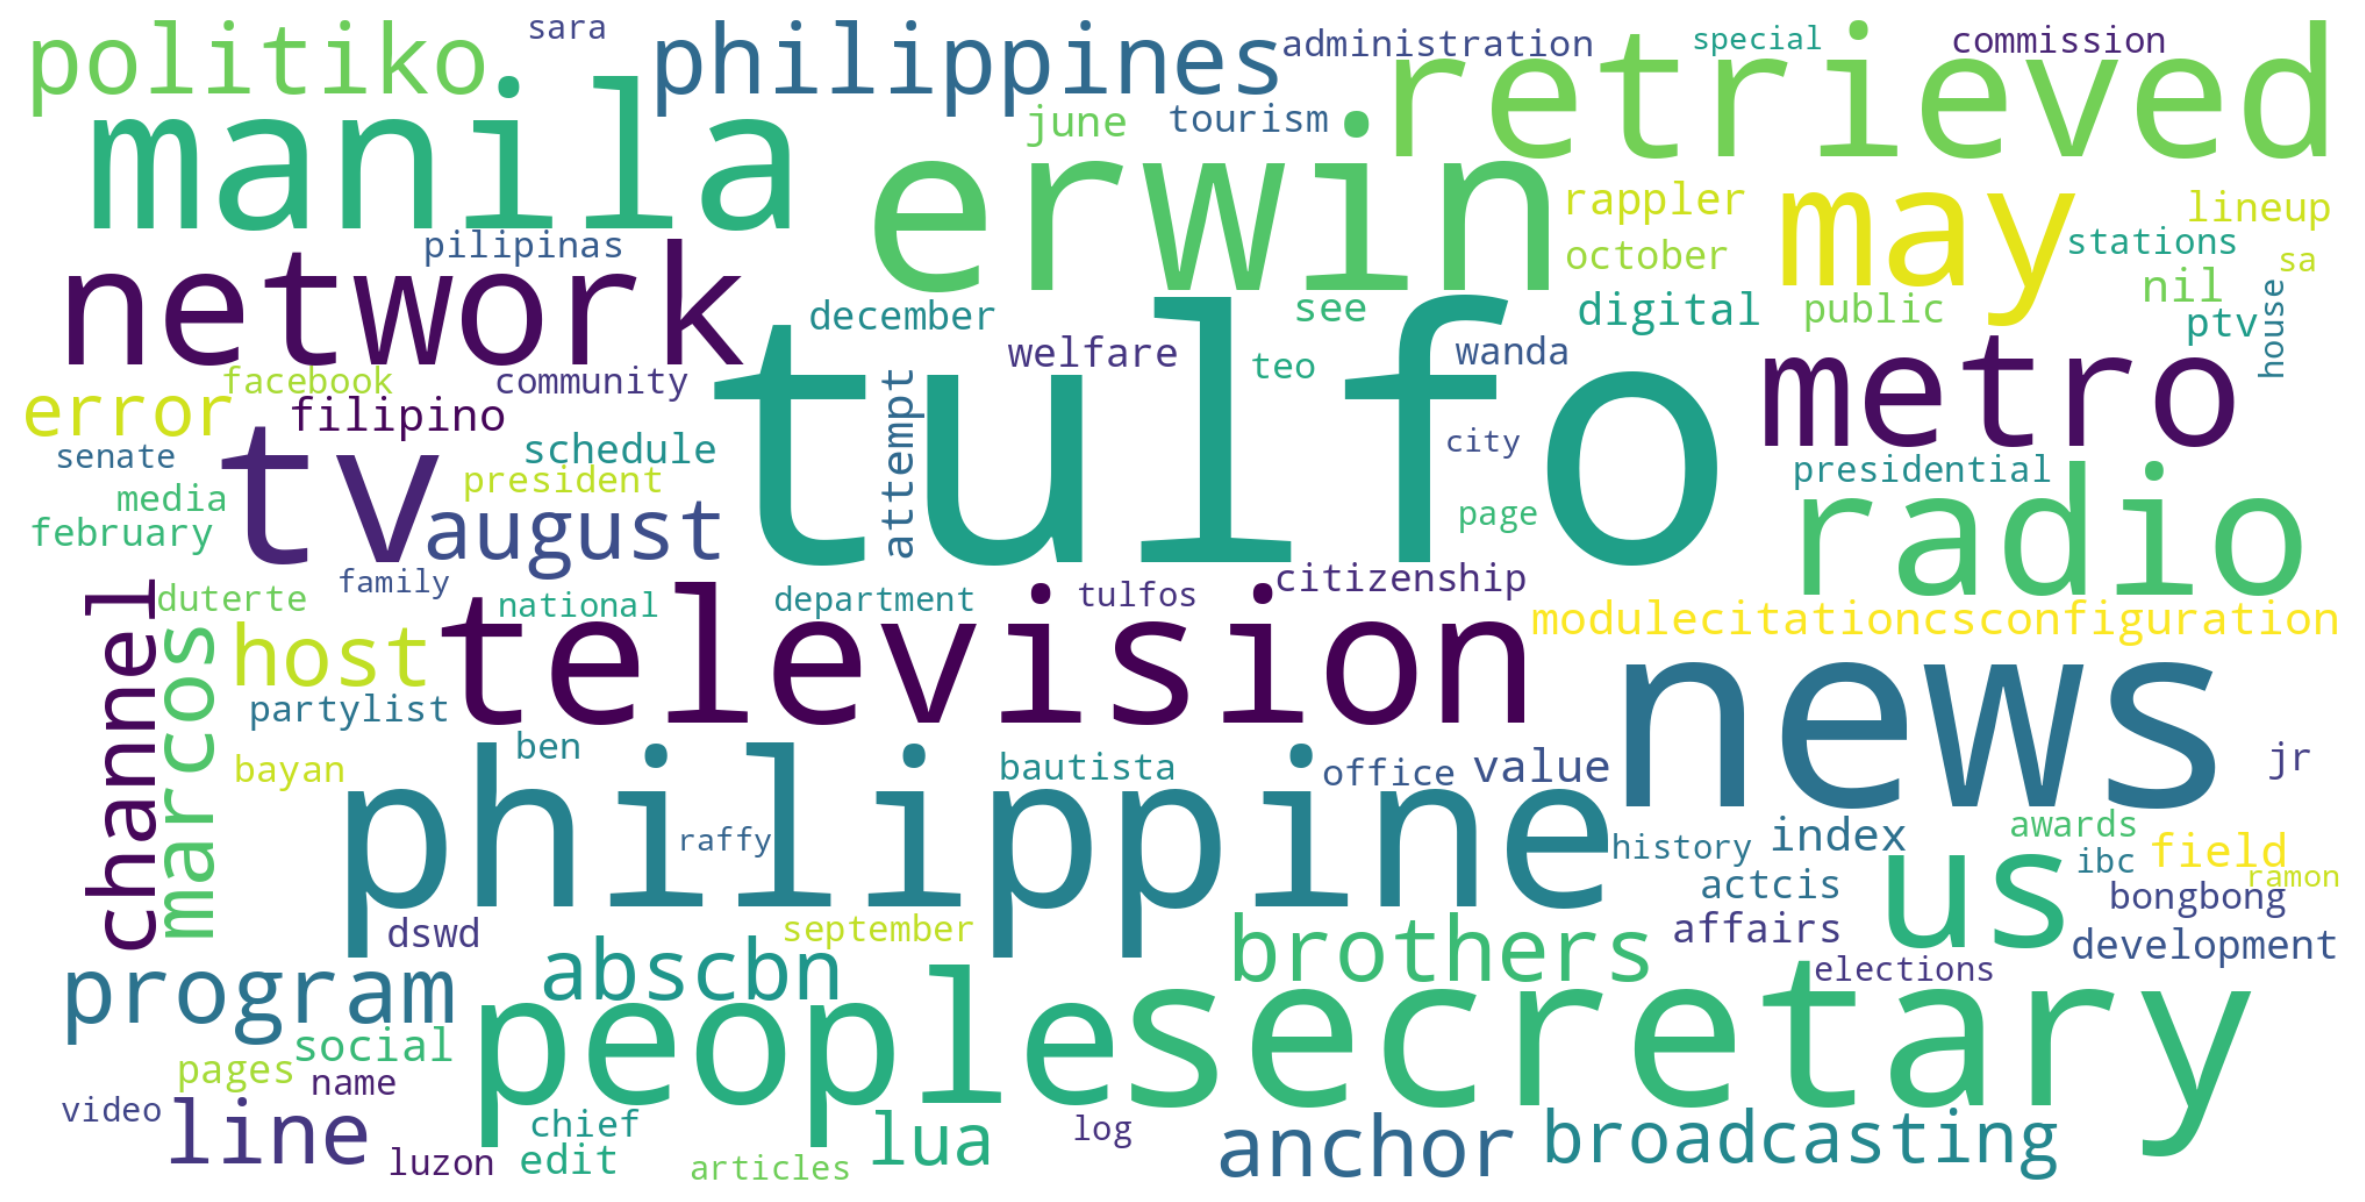

Name:  TULFO, ERWIN


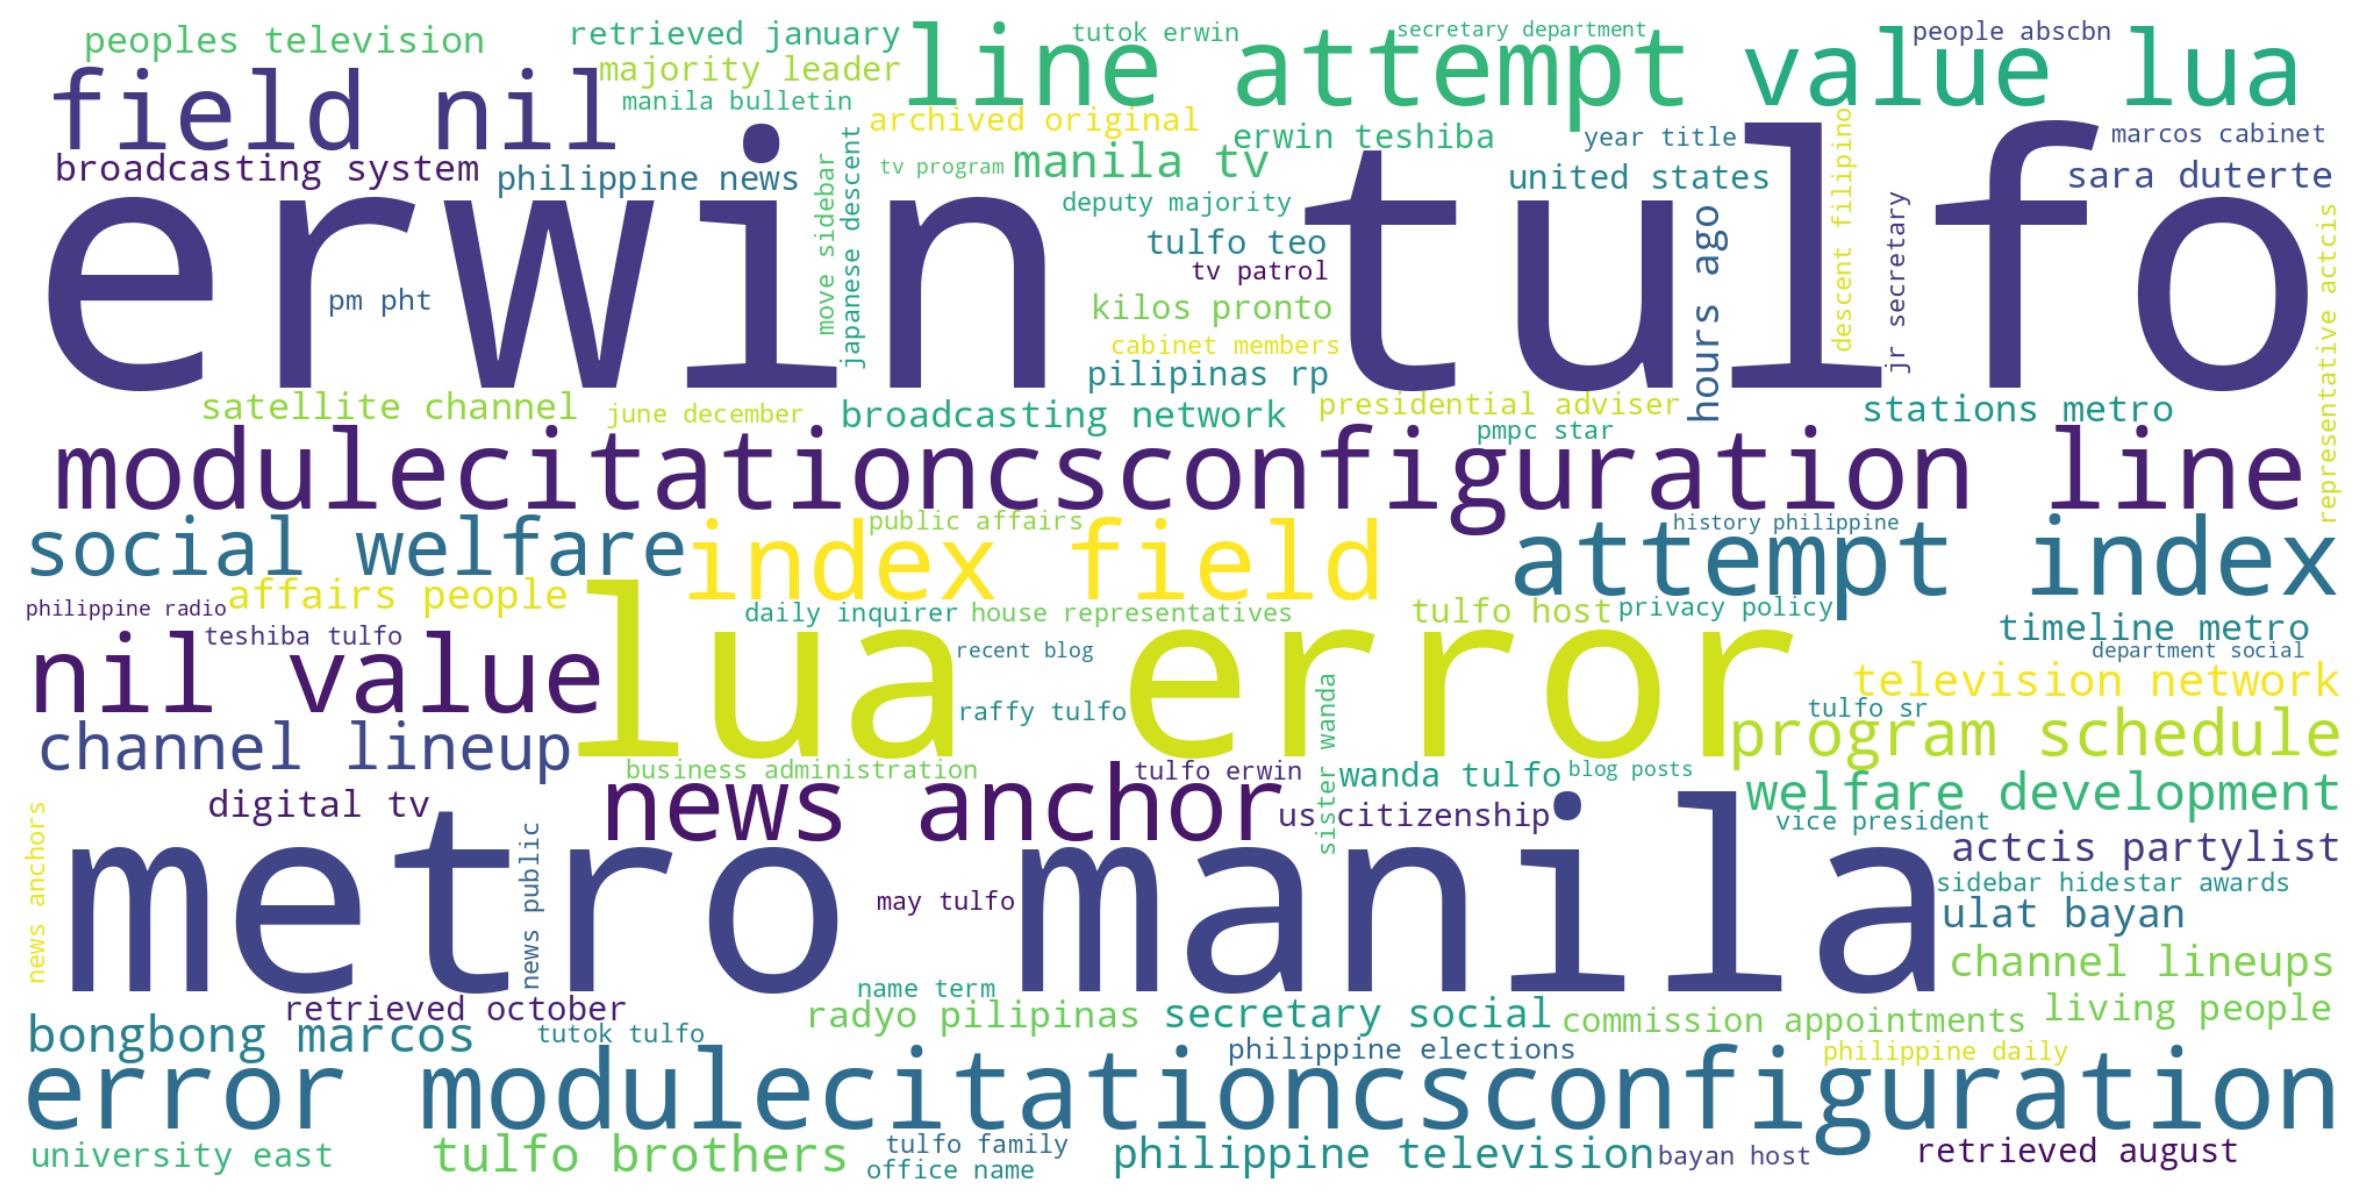

Name:  TULFO, ERWIN


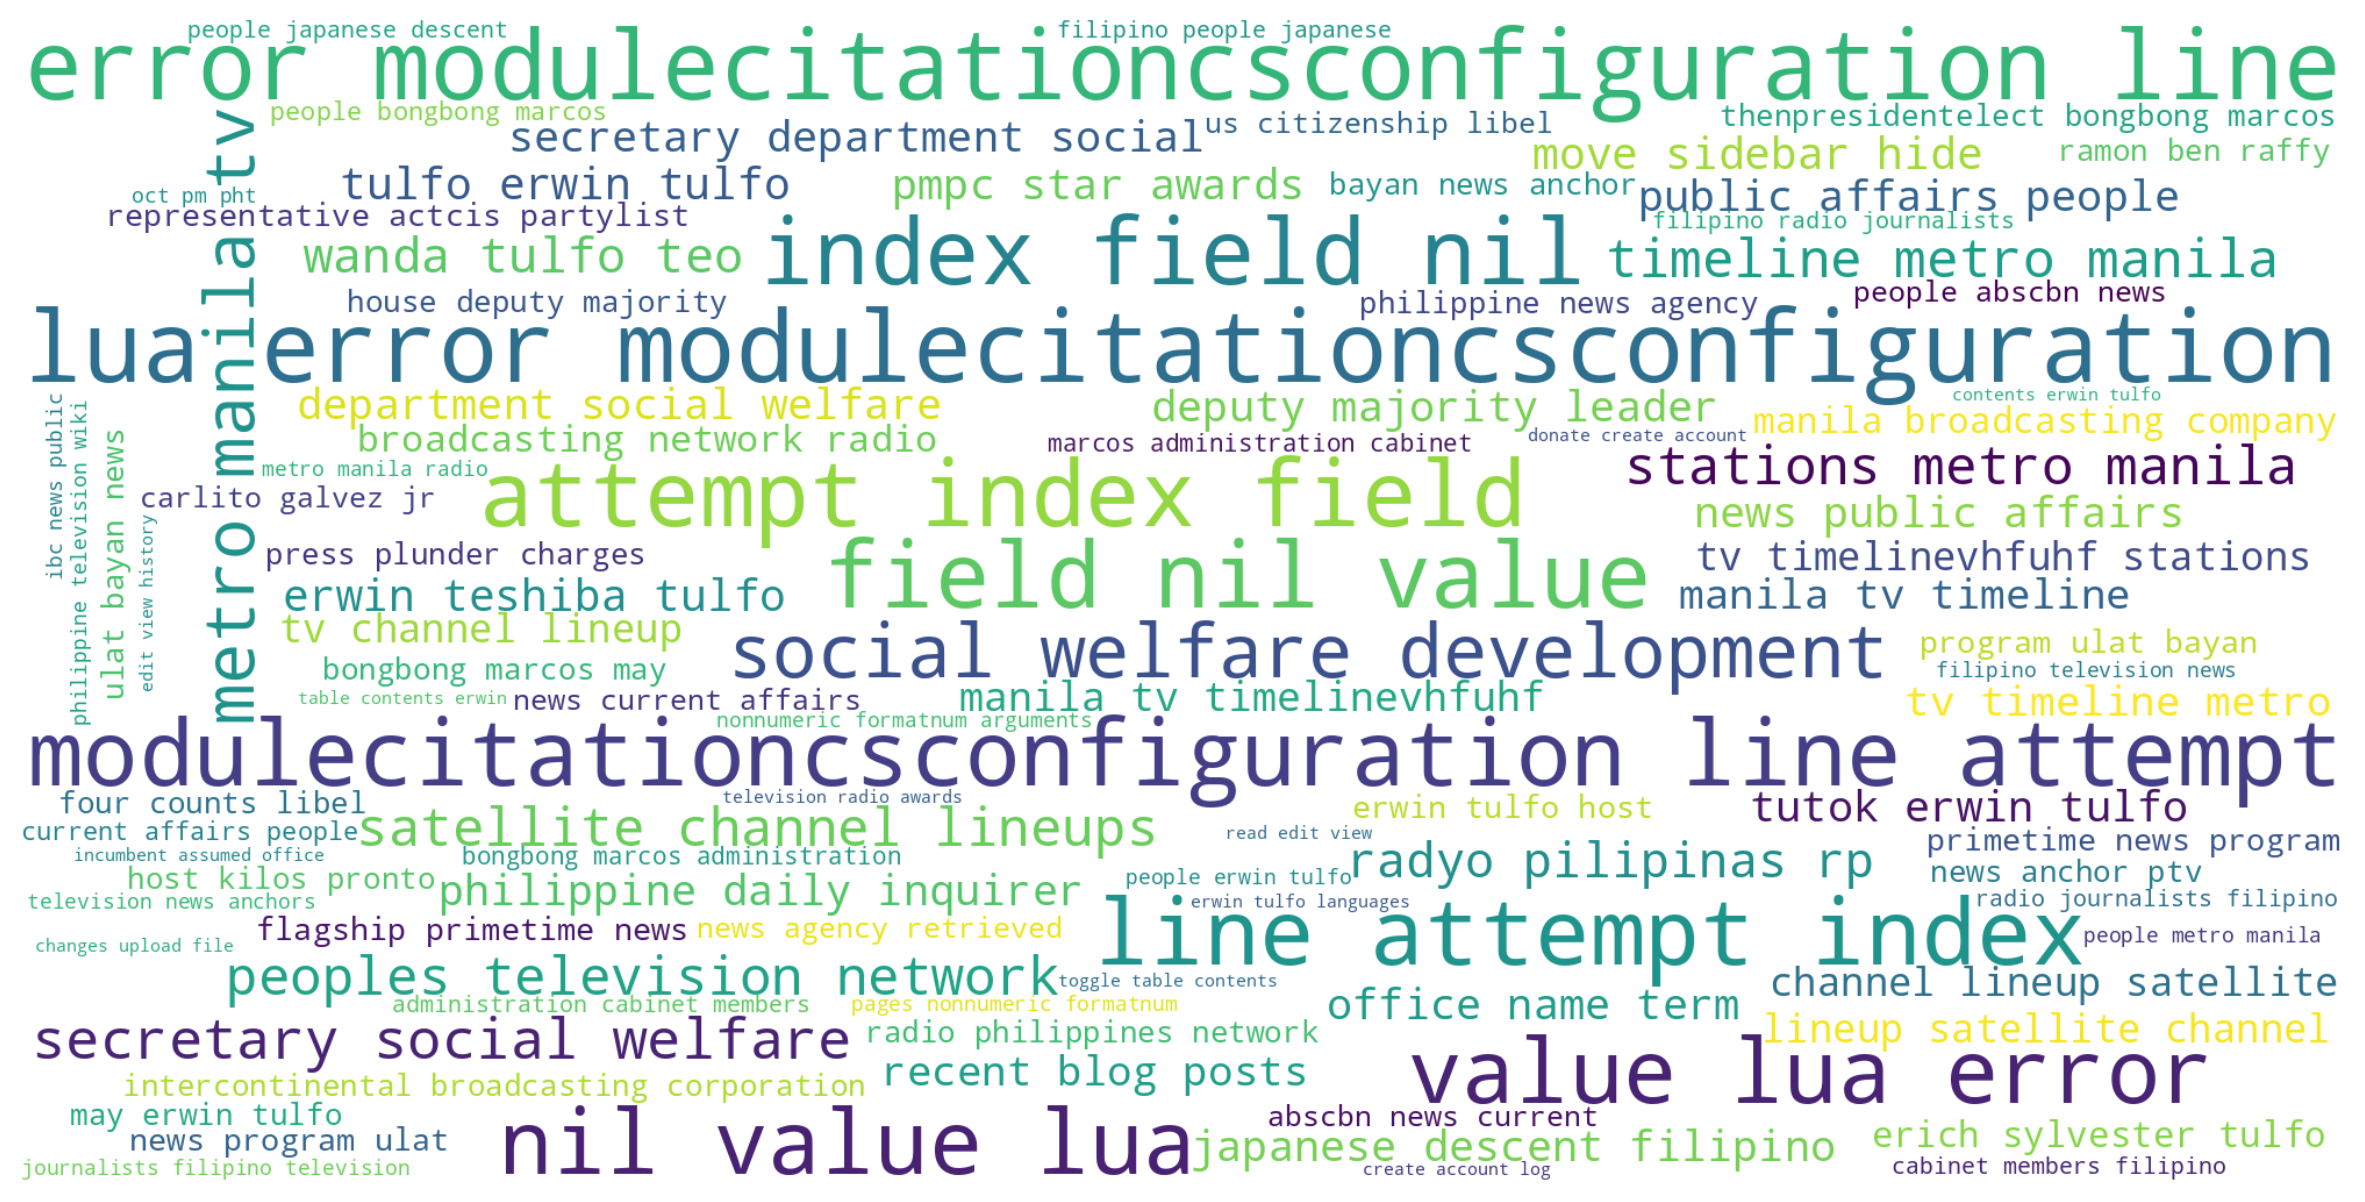

In [34]:
name = names[0]
tokens, bigrams, trigrams = get_tokens(name, num_results=10)

# Group the variables in a tuple or list
ngrams_data = (tokens, bigrams, trigrams)

# Iterate over the grouped variables
for item in ngrams_data:
  print("Name: ",name)
  display_word_cloud(item)